# Práctica 9

Esta practica se centra en el pronóstico de una variable continua en él tiempo, la cual es una de las herramientas/técnicas más utilizadas en la ciencia de datos debido a su extensa aplicación en muchos campos. En las practicas pasadas se estuvo utilizando una base de datos para resolver un problema de clasificación, por tal motivo se busco una base de datos en la página [**Kaggle**]( https://www.kaggle.com/) y la seleccionada fue una sobre [**datos climatológicos de Australia**]( https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) donde el objetivo original es predecir si lloverá o no al día siguiente, sin embargo, se tiene los datos de temperatura y cantidad de precipitación, los cuales pueden ser muy buenos para este caso donde se desea pronosticar cual será la temperatura y la cantidad de lluvia al día siguiente dado el historial.

Para la elaboración de esta práctica se basó en el artículo de **Aarshay Jain** sobre series de tiempo.

In [90]:
import pandas as pd
import numpy as np

pd.set_option('max_rows', 10)
data=pd.read_csv('../weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [91]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Al cargar los datos y mirar las columnas se observa que tiene variables reales, de caracteres y lógicas, la gran mayoría de carácter físicas además que la escala del tiempo es de años. Para nuestro propósito las variables de mayor interés es la temperatura máxima y la cantidad de lluvia, por lo tanto, es necesario dar estructura a los datos:

In [66]:
columnas=['Date','Location','MaxTemp','Rainfall']
data=pd.DataFrame(data,columns=columnas)
data.set_index('Date', inplace=True)
data=data.dropna()
data

,Location,MaxTemp,Rainfall
Date,,,
2008-12-01,Albury,22.9,0.6
2008-12-02,Albury,25.1,0.0
2008-12-03,Albury,25.7,0.0
2008-12-04,Albury,28.0,0.0
2008-12-05,Albury,32.3,1.0
...,...,...,...
2017-06-20,Uluru,21.8,0.0
2017-06-21,Uluru,23.4,0.0
2017-06-22,Uluru,25.3,0.0


Para establecer el alcance del análisis se centrará en la ciudad que presente mayor varianza en sus temperaturas máximas o cantidad de lluvia:

In [63]:
for i in data.Location.unique():
    print(i,data.Rainfall[data.Location==i].var(),data.MaxTemp[data.Location==i].var())

Albury 39.06247683647017 60.93935975276118
BadgerysCreek 55.26607608362884 35.89201546216474
Cobar 19.448049938104905 63.185249797609515
CoffsHarbour 304.8871586274435 14.63222146339827
Moree 42.437580528299506 47.696495787149985
Newcastle 103.28831911825336 28.684463310202897
NorahHead 88.46665152626319 18.809358432467988
NorfolkIsland 94.3107730161112 7.280952772053028
Penrith 51.83199825286391 38.125541563520635
Richmond 54.55265966178822 36.38266243062165
Sydney 97.96660802793654 20.16158670634809
SydneyAirport 84.48333822948074 26.03852995001665
WaggaWagga 35.06067313714274 62.31930092881881
Williamtown 141.1673987289541 29.357563934197774
Wollongong 140.93010865373688 16.21924207062886
Canberra 32.61932442651312 48.91925320797715
Tuggeranong 58.37182706921961 48.3247209415641
MountGinini 80.65802472910873 51.371021551903134
Ballarat 21.86131545191755 51.75411858369525
Bendigo 26.925368439738218 58.06372672052151
Sale 19.94250869218559 33.931121048765085
MelbourneAirport 21.093121

En base a los resultados anteriores se toman los **datos de cantidad de lluvia de la ciudad de Cairns** y para iniciar se grafican los datos contra el tiempo para poder visualizar la serie.

2964


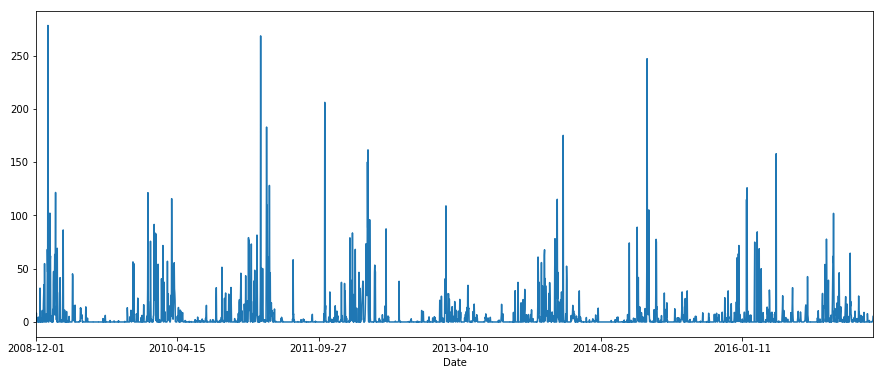

In [67]:
cairns=data.loc[data.Location=='Cairns']
cairns=cairns.drop(['Location','MaxTemp'],1)
print(len(cairns))
import matplotlib.pyplot as plt
cairns.Rainfall.plot(figsize=(15, 6))
plt.show()

Es interesante observar que la serie tiene un comportamiento muy definido. Un análisis visual de forma cualitativa hace pensar que la serie de tiempo es estacionaria, pero lo más interesante es la **posible disminución de las intensidades a medida que avanza el tiempo además de la densidad**. A continuación, se muestran los resultados de la prueba para una serie de tiempo estacionaria. 

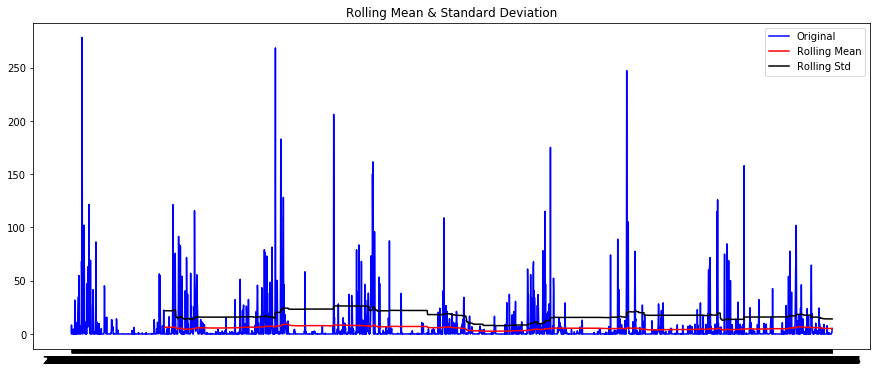

Results of Dickey-Fuller Test:
Test Statistic                -6.915027e+00
p-value                        1.185501e-09
#Lags Used                     2.500000e+01
Number of Observations Used    2.938000e+03
Critical Value (1%)           -3.432578e+00
Critical Value (5%)           -2.862524e+00
Critical Value (10%)          -2.567294e+00
dtype: float64


In [89]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(cairns.Rainfall)

 Los resultados de la prueba Dickey-Fuller dicen que la serie es estacionaria para todos los niveles de confianza, incluso el valor-p supera por mucho los limites impuestos por la prueba. De nuevo a simple vista la curva **Rolling mean** parece no tener grandes variaciones, sin embargo, sería bueno **ajustar una recta para estimar la pendiente y probar si es significativa para marcar alguna tendencia**. En el caso del **Rolling std** tiene cambios muy marcados, hasta da la sensación de ser una curva escalonada.